In [1]:
import sys

sys.path.append('./source/')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, stats
import matplotlib.cm as cm
from scipy import interpolate as intp
import importlib
import healpy


from source import plots
from source import prob_dists as pd
from utils import read_param_file, update_params, configure_plot_params

configure_plot_params(fontsize=10)

In [3]:
param_file = './source/n0.params'
params = read_param_file(param_file)
p = params
p

{'R_G': 220,
 'd_solar': 8.5,
 'psi': 40,
 'M_min': 0.1,
 'M_max': 10000000000.0,
 'fwimp': 1.78,
 'mean_params': {'a': 77.4, 'b': 0.87, 'c': -0.23},
 'nside': 128,
 'area_fermi': 2000.0,
 'n': 0,
 'log_flux_min': -16,
 'log_flux_max': -2,
 'N': 2200,
 'log_k_min': -2,
 'log_k_max': 10,
 'N_k': 250000,
 'psh_log_f_min': -7,
 'psh_log_f_max': -1.0,
 'N_psh': 1000,
 'omega_pixel': 6.391586616190171e-05,
 'exposure': 5570.423008216337,
 'iso_flux_bg': 0.0008615905978150363,
 'gal_flux_bg_file': './output/gal_flux_bg.npy',
 'bg': 1,
 'beg': 1,
 'beta': 1.9}

In [4]:
pltparams = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(pltparams)

colors = ['xkcd:pig pink', 'xkcd:windows blue']
n_labels = [r"$s$-wave ($n=0$)", r"Som. enh. ($n=-1$)"]

psi = 100

beta is 1.9
integral for 0 5.798436422190301e-11
beta is 1.5454
integral for -1 5.310010909745269e-10


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


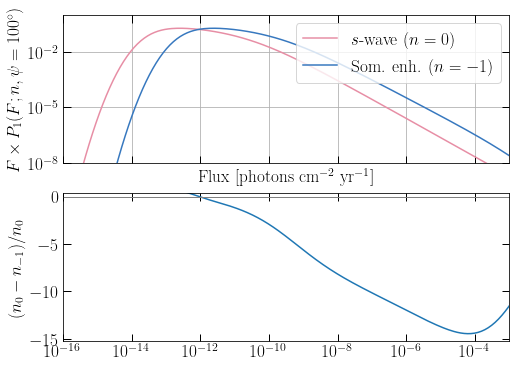

In [5]:
outfile = "./output/plots/p1_ssom_degeneracy.pdf"
fig, ax = plots.p1_plot(p, n_list=[0, -1], psi=psi, outfile=outfile, color=colors, shift=False, betas=[1.9, 1.5454], fwimps=[p['fwimp'], 0.01169695*9.029751204381899], residuals=True)

# ax.set_xlim(left=1e-16, right=1e-5)
# ax.set_ylim(bottom=1e-3, top=1)
# fig.savefig(outfile)

beta is 1.9
integral for 0 5.798436422190301e-11
beta is 1.9


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


integral for -1 7.676215619228403e-11


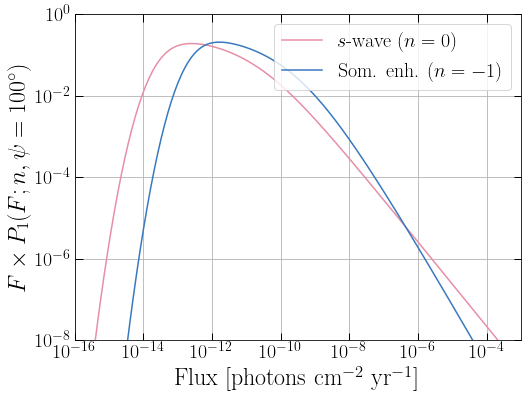

In [6]:
outfile = "./output/plots/p1_ssom.pdf"
p['M_min'] = 0.1
fig, ax = plots.p1_plot(p, n_list=[0, -1], psi=psi, outfile=outfile, color=colors, shift=False, betas=[1.9, 1.9], fwimps=[p['fwimp'], p['fwimp']/154*9.029751204381899], residuals=False)

# ax.set_xlim(left=1e-16, right=1e-5)
# ax.set_ylim(bottom=1e-3, top=1)
# fig.savefig(outfile)

In [7]:
# fig, ax = plt.subplots(figsize=(8, 6))
# lss = iter(['-', '--', ':', '-.'])

# for beta in [2.1, 1.9, 1.5, 1.1]:
#     with np.load(f'./output/n0_pshfunc_beta{int(beta*10):d}.npz') as f:
#         psis = f['psi']
#         fluxes = f['flux']
#         psh2d = f['psh']

#     pshfunc2d = intp.interp2d(psis, fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)
#     sfluxes = fluxes[:]
#     spsh = fluxes[psh2d[0].argmax()]

#     with np.load(f'./output/n-1_pshfunc_beta{int(beta*10):d}.npz') as f:
#         psis = f['psi']
#         fluxes = f['flux']
#         psh2d = f['psh']

#     psh2d[psh2d < 0] = 0

#     sompshfunc2d = intp.interp2d(psis, fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)
#     somfluxes = fluxes[:]


#     shift_som = somfluxes[(somfluxes*sompshfunc2d(psi, somfluxes).T).argmax()] / sfluxes[(sfluxes*pshfunc2d(psi, sfluxes).T).argmax()]
#     # psh2d *= shift_som
#     # fluxes /= shift_som

#     ls = next(lss)
#     ax.plot(sfluxes, sfluxes * pshfunc2d(psi, sfluxes).flatten(), label=n_labels[0]+str(beta), color=colors[0], ls=ls)
#     ax.plot(somfluxes / shift_som, somfluxes * sompshfunc2d(psi, somfluxes).flatten(), label=n_labels[-1]+str(beta), color=colors[-1], ls=ls)

#     ax.set_xscale('log')
#     ax.set_yscale('log')
#     ax.set_xlabel(r'Flux [photons cm$^{-2}$ yr$^{-1}$]')
#     ax.set_ylabel(rf'$P^n_{{sh}}(F)$ at $\psi={psi}^\circ$')

#     ax.set_xlim(left=2e-6, right=4e-4)
# #     ax.set_ylim(bottom=1e-4, top=100)
#     ax.grid()
#     lgd = ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))

# fig.savefig('./output/plots/psh_ssom.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [8]:
# fig, ax = plt.subplots(figsize=(8, 6))
# lss = iter(['-', '--', ':', '-.'])

# beta = 1.9
# for mmin in ['', '_Mmin1', '_Mmin1e2']:
#     with np.load(f'./output/n0_pshfunc_beta19' + mmin + '.npz') as f:
#         psis = f['psi']
#         fluxes = f['flux']
#         psh2d = f['psh']

#     pshfunc2d = intp.interp2d(psis, fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)
#     sfluxes = fluxes[10:-105]
#     spsh = fluxes[psh2d[0].argmax()]

#     with np.load(f'./output/n-1_pshfunc_beta19' + mmin + '.npz') as f:
#         psis = f['psi']
#         fluxes = f['flux']
#         psh2d = f['psh']

#     psh2d[psh2d < 0] = 0

# #     print(psh2d)
#     sompshfunc2d = intp.interp2d(psis, fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)
#     somfluxes = fluxes[5:]


#     shift_som = somfluxes[(somfluxes*sompshfunc2d(psi, somfluxes).T).argmax()] / sfluxes[(sfluxes*pshfunc2d(psi, sfluxes).T).argmax()]
#     # psh2d *= shift_som
#     # fluxes /= shift_som

#     ls = next(lss)
#     ax.plot(sfluxes, sfluxes * pshfunc2d(psi, sfluxes).flatten(), label=n_labels[0]+str(beta), color=colors[0], ls=ls)
#     ax.plot(somfluxes / shift_som, somfluxes * sompshfunc2d(psi, somfluxes).flatten(), label=n_labels[-1]+str(beta) + '$M_{min}=$' + mmin.lstrip('_Mmin'), color=colors[-1], ls=ls)

#     ax.set_xscale('log')
#     ax.set_yscale('log')
#     ax.set_xlabel(r'Flux [photons cm$^{-2}$ yr$^{-1}$]')
#     ax.set_ylabel(rf'$P^n_{{sh}}(F)$ at $\psi={psi}^\circ$')

#     ax.set_xlim(left=2e-6, right=1e-4)
# #     ax.set_ylim(bottom=1e-4, top=100)
#     ax.grid()
#     lgd = ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))

# fig.savefig('./output/plots/psh_ssom.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

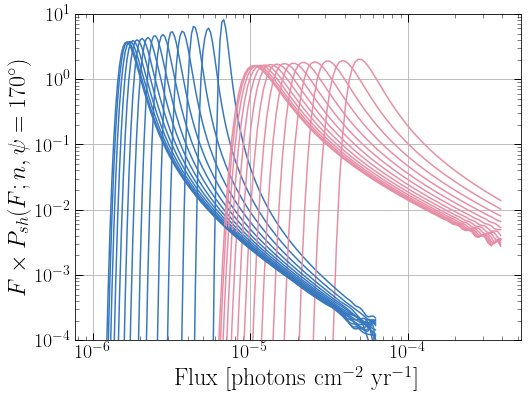

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
lss = iter(['-', '--', ':', '-.'])

psi = 100

files, mmins, betas = ['./output/n0_pshfunc_paper.npz', './output/n-1_pshfunc_paper.npz'], [1e-2, 1e-2], [1.9, 1.9]
# files, mmins, betas = ['./output/n0_pshfunc_beta19_Mmin1e-1.npz', './output/n-1_pshfunc_beta16_Mmin59e-3.npz'], [1e-1, 5.9e-2], [1.9, 1.57]
# files, mmins, betas = ['./output/n0_pshfunc_eric.npz', './output/n-1_pshfunc_eric.npz'], [1e0, 2.13], [1.9, 1.57]
# files, mmins, betas = ['./output/n-1_pshfunc_beta1579_Mmin59e-3.npz', './output/n-1_pshfunc_beta16_Mmin59e-3.npz'], [1e-1, 5.9e-2], [1.9, 1.57]
# files, mmins, betas = ['./output/n-1_pshfunc_beta19_Mmin1.npz', './output/n-1_pshfunc_beta16_Mmin1.npz'], [1e-1, 5.9e-2], [1.9, 1.57]
with np.load(files[0]) as f:
    psis = f['psi']
    fluxes = f['flux']
    psh2d = f['psh']

pshfunc2d = intp.interp2d(psis, fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)
sfluxes = fluxes[30:-120]
spsh = fluxes[psh2d[0].argmax()]

with np.load(files[1]) as f:
    psis = f['psi']
    fluxes = f['flux']
    psh2d = f['psh']

psh2d[psh2d < 0] = 0

#     print(psh2d)
sompshfunc2d = intp.interp2d(psis, fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)
somfluxes = fluxes[1:-100]


# shift_som = somfluxes[(somfluxes*sompshfunc2d(psi, somfluxes).T).argmax()] / sfluxes[(sfluxes*pshfunc2d(psi, sfluxes).T).argmax()]
shift_som = 0.35
shift_som = 1
# psh2d *= shift_som
# fluxes /= shift_som

ls = next(lss)
for psi in range(40, 180, 10):
    ax.plot(sfluxes, sfluxes * pshfunc2d(psi, sfluxes).flatten(), label=n_labels[0], color=colors[0], ls=ls)
    ax.plot(somfluxes / shift_som, somfluxes * sompshfunc2d(psi, somfluxes).flatten(), label=n_labels[-1], color=colors[-1], ls=ls)

# ax.plot(sfluxes, sfluxes * pshfunc2d(psi, sfluxes).flatten(), label=n_labels[0]+str(betas[0]) + '  $M_{min}=$' + str(mmins[0]), color=colors[0], ls=ls)
# ax.plot(somfluxes / shift_som, somfluxes * sompshfunc2d(psi, somfluxes).flatten(), label=n_labels[-1]+str(betas[1]) + ' $M_{min}=$' + str(mmins[1]), color=colors[-1], ls=ls)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Flux [photons cm$^{-2}$ yr$^{-1}$]')
ax.set_ylabel(rf'$F \times P_{{sh}}(F;n,\psi={psi}^\circ)$')

# ax.set_xlim(left=2e-6, right=1e-3)
ax.set_ylim(bottom=1e-4, top=10)
ax.grid()
# lgd = ax.legend(loc='upper right')
# lgd = ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))

# fig.savefig('./output/plots/psh_ssom.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

-2.0344827586206895 [3.6215572  3.5786379  3.53622724 3.4943192  3.45290781 3.41198719
 3.37155152 3.33159506 3.29211212 3.2530971 ]


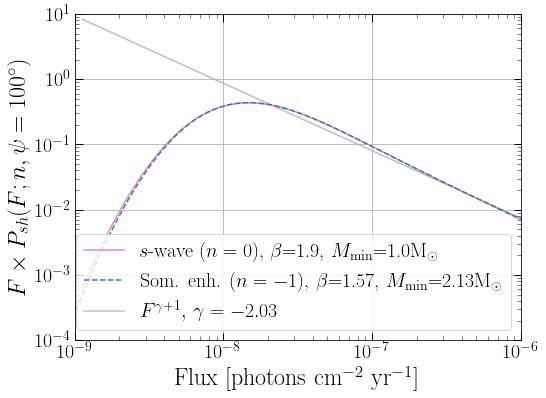

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))
lss = iter(['-', '--', ':', '-.'])

# files, mmins, betas = ['./output/n0_pshfunc_beta19_Mmin1e-1.npz', './output/n-1_pshfunc_beta16_Mmin59e-3.npz'], [1e-1, 5.9e-2], [1.9, 1.57]
# files, mmins, betas = ['./output/n0_pshfunc_eric.npz', './output/n-1_pshfunc_eric.npz'], [1e0, 2.13], [1.9, 1.57]
files, mmins, betas = ['./output/psh_degeneracy_swave.npz', './output/psh_degeneracy_som.npz'], [1e0, 2.13], [1.9, 1.57]
# files, mmins, betas = ['./output/n0_pshfunc_paper.npz', './output/n-1_pshfunc_paper.npz'], [1e-1, 1e-1], [1.9, 1.9]
# files, mmins, betas = ['./output/n-1_pshfunc_beta1579_Mmin59e-3.npz', './output/n-1_pshfunc_beta16_Mmin59e-3.npz'], [1e-1, 5.9e-2], [1.9, 1.57]
# files, mmins, betas = ['./output/n-1_pshfunc_beta19_Mmin1.npz', './output/n-1_pshfunc_beta16_Mmin1.npz'], [1e-1, 5.9e-2], [1.9, 1.57]
# with np.load(files[0]) as f:
#     psis = f['psi']
#     fluxes = f['flux']
#     psh2d = f['psh']

# pshfunc2d = intp.interp2d(psis, fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)
# sfluxes = fluxes[40:-95]
# spsh = fluxes[psh2d[0].argmax()]

# with np.load(files[1]) as f:
#     psis = f['psi']
#     fluxes = f['flux']
#     psh2d = f['psh']

# psh2d[psh2d < 0] = 0

# #     print(psh2d)
# sompshfunc2d = intp.interp2d(psis, fluxes, np.nan_to_num(psh2d), bounds_error=False, fill_value=0)
# somfluxes = fluxes[30:-70]

with np.load(files[0]) as f:
    sfluxes = f['fluxes']
    spsh = f['psh']

with np.load(files[1]) as f:
    somfluxes = f['fluxes']
    sompsh = f['psh']



# shift_som = somfluxes[(somfluxes*sompshfunc2d(psi, somfluxes).T).argmax()] / sfluxes[(sfluxes*pshfunc2d(psi, sfluxes).T).argmax()]
shift_som = 1
shift_som = 1 / np.trapz(spsh * sfluxes, sfluxes) * np.trapz(sompsh * somfluxes, somfluxes)
# psh2d *= shift_som
# fluxes /= shift_som

ls = next(lss)
ax.plot(sfluxes, sfluxes * spsh.flatten(), label=n_labels[0]+r', $\beta$=' + str(betas[0]) + r', $M_\mathrm{min}$=' + str(mmins[0])+'M$_\odot$', color=colors[0], ls=ls)
ls = next(lss)
ax.plot(somfluxes / shift_som, somfluxes * sompsh.flatten(), label=n_labels[-1]+ r', $\beta$=' + str(betas[1]) + r', $M_\mathrm{min}$=' + str(mmins[1])+'M$_\odot$', color=colors[-1], ls=ls)

n = 0
alpha = 0.87 + 0.31 * n
gamma = (1 - betas[n])/alpha - 1
amp = 4.6e-9
print(gamma, amp*sfluxes[70:80]**(gamma+1))
ax.plot(sfluxes, amp * sfluxes**(gamma+1), color='xkcd:gray', ls='-', alpha=0.6, zorder=-100, label=rf'$F^{{\gamma+1}},\,\gamma={gamma:.2f}$')
# ax.plot(sfluxes, amp * sfluxes**(gamma+1), color='xkcd:gray', ls='-', alpha=0.6, zorder=-100, label=rf'$F\times P_{{sh}}\propto F^{{{gamma+1:.2f}}}$')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Flux [photons cm$^{-2}$ yr$^{-1}$]')
ax.set_ylabel(rf'$F \times P_{{sh}}(F;n,\psi={psi}^\circ)$')

ax.set_xlim(left=1e-9, right=1e-6)
ax.set_ylim(bottom=1e-4, top=10)
ax.grid()
# lgd = ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
lgd = ax.legend(loc='lower right')

fig.savefig('./output/plots/psh_ssom_degeneracy.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

(250, 50)
-2.6071428571428568 [0.17753176 0.1697903  0.16238642 0.1553054  0.14853315 0.14205621
 0.1358617  0.12993731 0.12427126 0.11885229]
s mean 2.8456287117051942e-05
som mean 2.845624697319787e-05
ratio 1.000001410722015


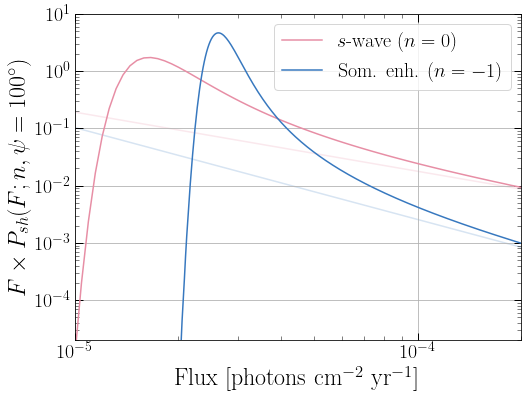

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
lss = iter(['-', '--', ':', '-.'])

psi = 100

files, mmins, betas = ['./output/n0_pshfunc_paper.npz', './output/n-1_pshfunc_paper.npz'], [1e-1, 1e-1], [1.9, 1.9]
# files, mmins, betas = ['./output/n0_pshfunc_beta19_Mmin1e-1.npz', './output/n-1_pshfunc_beta16_Mmin59e-3.npz'], [1e-1, 5.9e-2], [1.9, 1.57]
# files, mmins, betas = ['./output/n0_pshfunc_eric.npz', './output/n-1_pshfunc_eric.npz'], [1e0, 2.13], [1.9, 1.57]
# files, mmins, betas = ['./output/n-1_pshfunc_beta1579_Mmin59e-3.npz', './output/n-1_pshfunc_beta16_Mmin59e-3.npz'], [1e-1, 5.9e-2], [1.9, 1.57]
# files, mmins, betas = ['./output/n-1_pshfunc_beta19_Mmin1.npz', './output/n-1_pshfunc_beta16_Mmin1.npz'], [1e-1, 5.9e-2], [1.9, 1.57]
with np.load(files[0]) as f:
    psis = f['psi']
    fluxes = f['flux']
    psh2d = f['psh']

sfluxes = fluxes[30:-120]
spsh = fluxes[psh2d[0].argmax()]
psh2d = np.nan_to_num(psh2d[30:-120, :], nan=0)
psh2d[psh2d <= 0] = 0
# psiss, sfluxs = np.meshgrid(psis, sfluxes)
pshfunc2d = intp.interp2d(psis, sfluxes, np.nan_to_num(psh2d), bounds_error=False, kind='cubic')
# pshfunc2d = intp.SmoothBivariateSpline(psiss.flatten(), sfluxs.flatten(), psh2d.flatten())

with np.load(files[1]) as f:
    psis = f['psi']
    fluxes = f['flux']
    psh2d = f['psh']

psh2d[psh2d < 0] = 0

#     print(psh2d)
somfluxes = fluxes[1:-80]
print(psh2d.shape)
psh2d = psh2d[1:-80, :]
sompshfunc2d = intp.interp2d(psis, somfluxes, np.nan_to_num(psh2d), bounds_error=False, kind='cubic')


# shift_som = somfluxes[(somfluxes*sompshfunc2d(psi, somfluxes).T).argmax()] / sfluxes[(sfluxes*pshfunc2d(psi, sfluxes).T).argmax()]
shift_som = 0.35
shift_som = 1/10.6404808663
# shift_som = 1/13.333232303696379
# psh2d *= shift_som
# fluxes /= shift_som

ls = next(lss)

n = 0
alpha = 0.87 + 0.31 * n
gamma = (1 - betas[n])/alpha - 1
amp = 1.3e-6
# print(gamma, amp*sfluxes[70:80]**gamma)
sfluxes = np.logspace(-5, -3, num=100)
ax.plot(sfluxes, amp * sfluxes**(gamma+1), color=colors[0], ls='-', alpha=0.2, zorder=-100)

ax.plot(sfluxes, sfluxes * pshfunc2d(psi, sfluxes).flatten(), label=n_labels[0], color=colors[0], ls=ls)
# ax.plot(sfluxes, sfluxes * pshfunc2d.ev(psi, sfluxes).flatten(), label=n_labels[0], color=colors[0], ls=ls)

n = -1
alpha = 0.87 + 0.31 * n
gamma = (1 - betas[n])/alpha - 1
amp = 0.9e-10 / shift_som
print(gamma, amp*somfluxes[70:80]**(gamma+1))
somfluxes = np.logspace(-5, -3.3, num=500) * shift_som
ax.plot(somfluxes / shift_som, amp * (somfluxes / shift_som)**(gamma+1), color=colors[1], ls='-', alpha=0.2, zorder=-100)

ax.plot(somfluxes / shift_som, somfluxes * sompshfunc2d(psi, somfluxes).flatten(), label=n_labels[-1], color=colors[-1], ls=ls)

# ax.plot(sfluxes, sfluxes * pshfunc2d(psi, sfluxes).flatten(), label=n_labels[0]+str(betas[0]) + '  $M_{min}=$' + str(mmins[0]), color=colors[0], ls=ls)
# ax.plot(somfluxes / shift_som, somfluxes * sompshfunc2d(psi, somfluxes).flatten(), label=n_labels[-1]+str(betas[1]) + ' $M_{min}=$' + str(mmins[1]), color=colors[-1], ls=ls)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Flux [photons cm$^{-2}$ yr$^{-1}$]')
ax.set_ylabel(rf'$F \times P_{{sh}}(F;n,\psi={psi}^\circ)$')

ax.set_xlim(left=1e-5, right=2e-4)
ax.set_ylim(bottom=2e-5, top=10)
ax.grid()
lgd = ax.legend(loc='upper right')
# lgd = ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))

smean = np.trapz(sfluxes * pshfunc2d(psi, sfluxes).flatten(), sfluxes)
sommean = np.trapz(somfluxes / shift_som * sompshfunc2d(psi, somfluxes).flatten(), somfluxes)
print('s mean', smean)
print('som mean', sommean) 
print('ratio', smean/sommean)
fig.savefig('./output/plots/psh_ssom.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

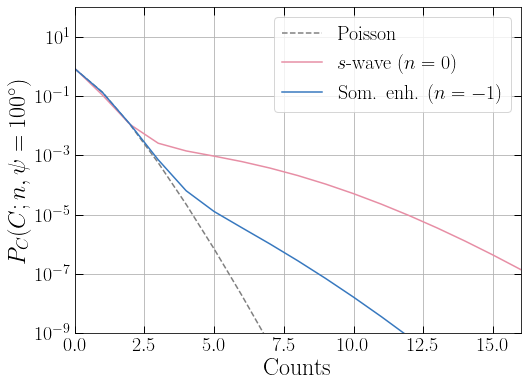

In [12]:
from scipy.stats import poisson

counts = np.arange(0, 18)
exposure = p['exposure']

pp = poisson.pmf(counts, exposure*np.trapz(sfluxes * pshfunc2d(psi, sfluxes).flatten(), sfluxes))
    
pcvals = np.trapz(pshfunc2d(psi, sfluxes).flatten() * poisson.pmf(counts[:, np.newaxis], exposure * sfluxes), sfluxes, axis=-1)


ppsom = poisson.pmf(counts, exposure*np.trapz(somfluxes * sompshfunc2d(psi, somfluxes).flatten(), somfluxes / shift_som))

pcsomvals = np.trapz(sompshfunc2d(psi, somfluxes).flatten() * poisson.pmf(counts[:, np.newaxis], exposure / shift_som * somfluxes), somfluxes, axis=-1)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(counts, pp, '--', label=r'Poisson', color='gray')
ax.plot(counts, pcvals, label=n_labels[0], color=colors[0])
# ax.plot(counts, ppsom, '--', label=r'Poisson norm to Som. enh.', color=colors[-1])
ax.plot(counts, pcsomvals, label=n_labels[-1], color=colors[-1])

ax.set_yscale('log')
ax.set_ylabel(rf'$P_C(C;n,\psi={psi}^\circ)$')
ax.set_xlabel('Counts')
ax.grid()
ax.legend(loc='upper right')

ax.set_ylim(bottom=1e-9, top=1e2)
ax.set_xlim(left=0, right=16)

fig.savefig('./output/plots/pc_ssom.pdf')

In [13]:
# pd.mu(100, beta=2.1), pd.mu(100, beta=1.9), pd.mu(100, beta=1.5), pd.mu(100, beta=1.1)
p['psi'] = psi
pd.mu(**p), p['psi'], p['M_min']

beta is 1.9


(array([86919.63504587]), 100, 0.1)

/usr/local/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("plasma"))
  newcm.set_over(newcm(1.0))
/usr/local/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("plasma"))
  newcm.set_under(bgcolor)
/usr/local/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To re

s sum 8214.0
som sum 8456.0


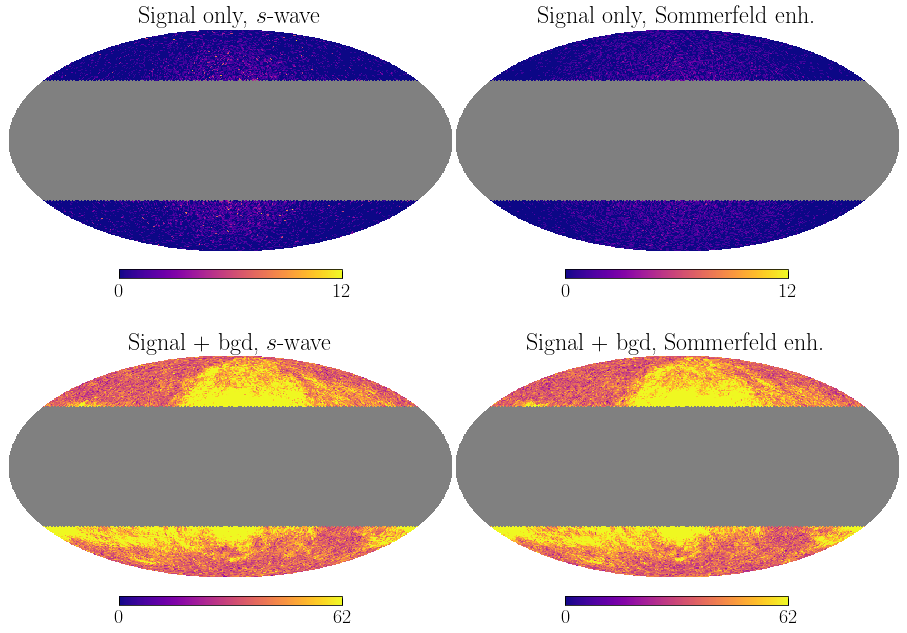

In [14]:
# fiducial fermi exposure and fwimp = phipp swave
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

s_map = './output/n0_skymap_71404.npy'
som_map = './output/n-1_skymap_40087.npy'

nreduce = 64

pixel_counts_pc = np.load(s_map)
cmin = 0
cmax = pixel_counts_pc.max()
cmap = cm.plasma

plt.axes(axs[0, 0])
healpy.mollview(healpy.pixelfunc.ud_grade(healpy.pixelfunc.ma(pixel_counts_pc), nreduce, pess=True, power=-2), cmap=cmap, min=cmin, max=cmax, title=r"Signal only, $s$-wave", hold=True)

print('s sum', np.sum(healpy.pixelfunc.ma(pixel_counts_pc)))

pixel_counts_pc = np.load(som_map)
if pixel_counts_pc.max() > cmax:
    print('warning: som map max is larger than s map max. colorbar will be saturated for som')
    
plt.axes(axs[0, 1])
healpy.mollview(healpy.pixelfunc.ud_grade(healpy.pixelfunc.ma(pixel_counts_pc), nreduce, pess=True, power=-2), cmap=cmap, min=cmin, max=cmax, title=r"Signal only, Sommerfeld enh.", hold=True)

print('som sum', np.sum(healpy.pixelfunc.ma(pixel_counts_pc)))


# maps w/ bgd
s_map = './output/n0_skymap_87466.npy'
som_map = './output/n-1_skymap_31416.npy'

pixel_counts_pc = np.load(s_map)
cmin = 0
cmax = pixel_counts_pc.max()
plt.axes(axs[1, 0])
healpy.mollview(healpy.pixelfunc.ud_grade(healpy.pixelfunc.ma(pixel_counts_pc), nreduce, pess=True, power=-2), cmap=cmap, min=cmin, max=cmax, title=r"Signal + bgd, $s$-wave", hold=True)

pixel_counts_pc = np.load(som_map)
plt.axes(axs[1, 1])
healpy.mollview(healpy.pixelfunc.ud_grade(healpy.pixelfunc.ma(pixel_counts_pc), nreduce, pess=True, power=-2), cmap=cmap, min=cmin, max=cmax, title=r"Signal + bgd, Sommerfeld enh.", hold=True)

fig.savefig('./output/plots/skymaps_signal_only.pdf')

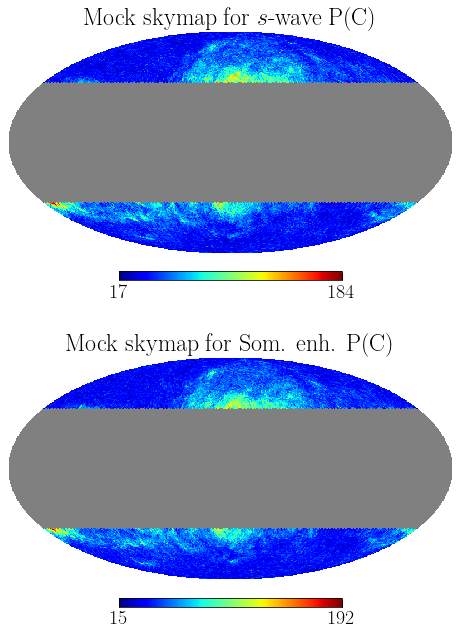

In [15]:
# fiducial fermi exposure and fwimp = phipp swave
s_map = './output/plots/n0_skymap_59674.npy'
som_map = './output/plots/n-1_skymap_81209.npy'

nreduce = 64

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 12))

pixel_counts_pc = np.load(s_map)
plt.axes(ax1)
healpy.mollview(healpy.pixelfunc.ud_grade(healpy.pixelfunc.ma(pixel_counts_pc), nreduce, pess=True, power=-2), cmap=cm.jet, title=r"Mock skymap for $s$-wave P(C)", hold=True)

pixel_counts_pc = np.load(som_map)
plt.axes(ax2)
som_map = healpy.mollview(healpy.pixelfunc.ud_grade(healpy.pixelfunc.ma(pixel_counts_pc), nreduce, pess=True, power=-2), cmap=cm.jet, title=r"Mock skymap for Som. enh. P(C)", hold=True)

fig.savefig('./output/plots/skymaps.pdf')


In [16]:
n = 0
beta = 1.9
alpha = 0.87 + 0.31 * n
gamma = (1 - beta)/alpha - 1
alpha, beta, gamma

(0.87, 1.9, -2.0344827586206895)

In [17]:
n = -1
alpha = 0.87 + 0.31 * n
# gamma = (1 - beta)/alpha - 1
beta = 1 - (gamma + 1) * alpha
alpha, beta, gamma

(0.56, 1.579310344827586, -2.0344827586206895)

In [18]:
pd.mu(100, beta=1.9, M_min=1), pd.mu(100, beta=beta, M_min=2.13)

beta is 1.9
beta is 1.579310344827586


(array([51884.52662957]), array([51624.52546802]))

In [19]:
# for psi in range(40, 180, 10):
#     print(psi, (pd.mu(psi, beta=1.9, M_min=.1) - pd.mu(psi, beta=beta, M_min=5.9e-2))/pd.mu(psi, beta=1.9, M_min=.1))